In [1]:
%matplotlib inline
import pymc as pm
import matplotlib.pyplot as plt
import scipy.stats as st
import arviz as az
#import metropolis_commands as mc
import numpy as np
import warnings
warnings.filterwarnings("ignore")

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
good_chains = st.beta.rvs(2, 5,size=(2, 2000))
bad_chains0 = np.random.normal(np.sort(good_chains, axis=None), 0.05,
    size=4000).reshape(2, -1)
bad_chains1 = good_chains.copy()
for i in np.random.randint(1900, size=4):
  bad_chains1[i%2:,i:i+100] = np.random.beta(i, 950, size=100)

chains = {"good_chains":good_chains,
          "bad_chains0":bad_chains0,
          "bad_chains1":bad_chains1}

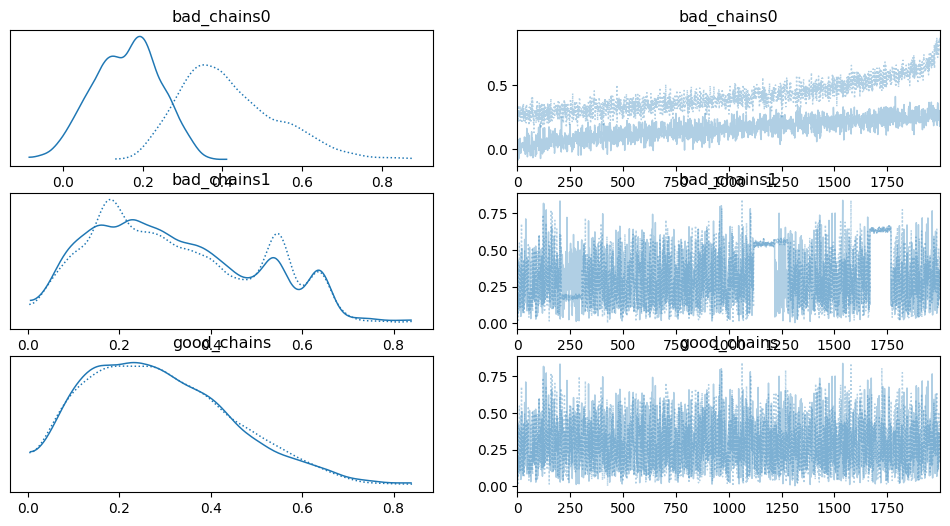

In [3]:
az.plot_trace(chains);

In [4]:
az.summary(chains)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
bad_chains0,0.289,0.166,0.017,0.612,0.108,0.088,2.0,11.0,2.42
bad_chains1,0.322,0.177,0.060,0.648,0.016,0.012,149.0,157.0,1.02
good_chains,0.289,0.159,0.016,0.569,0.003,0.002,3960.0,3731.0,1.00
